In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics   
import matplotlib.style


In [2]:
df=pd.read_csv('Iris - Iris.csv')

THE TOP 5 ROWS OF THE DATASET

In [3]:
df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

THE BOTTOM FIVE ORWS OF THE DATASET

In [4]:
df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df1=df.drop("Id",axis='columns')

THE DATA SUMMARY OF THE DATAFRAME

In [132]:
df1.describe()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species
count     147.000000    147.000000     147.000000    147.000000  147.000000
mean        5.856463      3.055782       3.780272      1.208844    1.006803
std         0.829100      0.437009       1.759111      0.757874    0.815069
min         4.300000      2.000000       1.000000      0.100000    0.000000
25%         5.100000      2.800000       1.600000      0.300000    0.000000
50%         5.800000      3.000000       4.400000      1.300000    1.000000
75%         6.400000      3.300000       5.100000      1.800000    2.000000
max         7.900000      4.400000       6.900000      2.500000    2.000000

In [15]:
df1

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

In [41]:
df1.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [58]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

NO NULL VALUES PRESENT IN THE DATASET

In [60]:
dups= df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of duplicate rows = 3


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
34             4.9           3.1            1.5           0.1     Iris-setosa
37             4.9           3.1            1.5           0.1     Iris-setosa
142            5.8           2.7            5.1           1.9  Iris-virginica

THERE ARE 3 DUPLICATE ROWS PRESENT IN THE DATASET SO WE DROP THEM

In [61]:
df1.drop_duplicates(inplace=True)

In [62]:
dups= df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []

In [63]:
df1.duplicated().sum()

0

# UNIVARIATE ANALYSIS

In [64]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(df[column].min())
    b=round(df[column].max())
    freq, bins, patches = plt.hist(df[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    for fr, x, patch in zip(freq, bin_centers, patches):
      height = int(freq[n])
      plt.annotate("{}".format(height),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
      n = n+1

    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    #ax.legend()
    plt.show()

In [65]:
df1_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

4

Description of SepalLengthCm
----------------------------------------------------------------------------
count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64 Distribution of SepalLengthCm
----------------------------------------------------------------------------
BoxPlot of SepalLengthCm
----------------------------------------------------------------------------


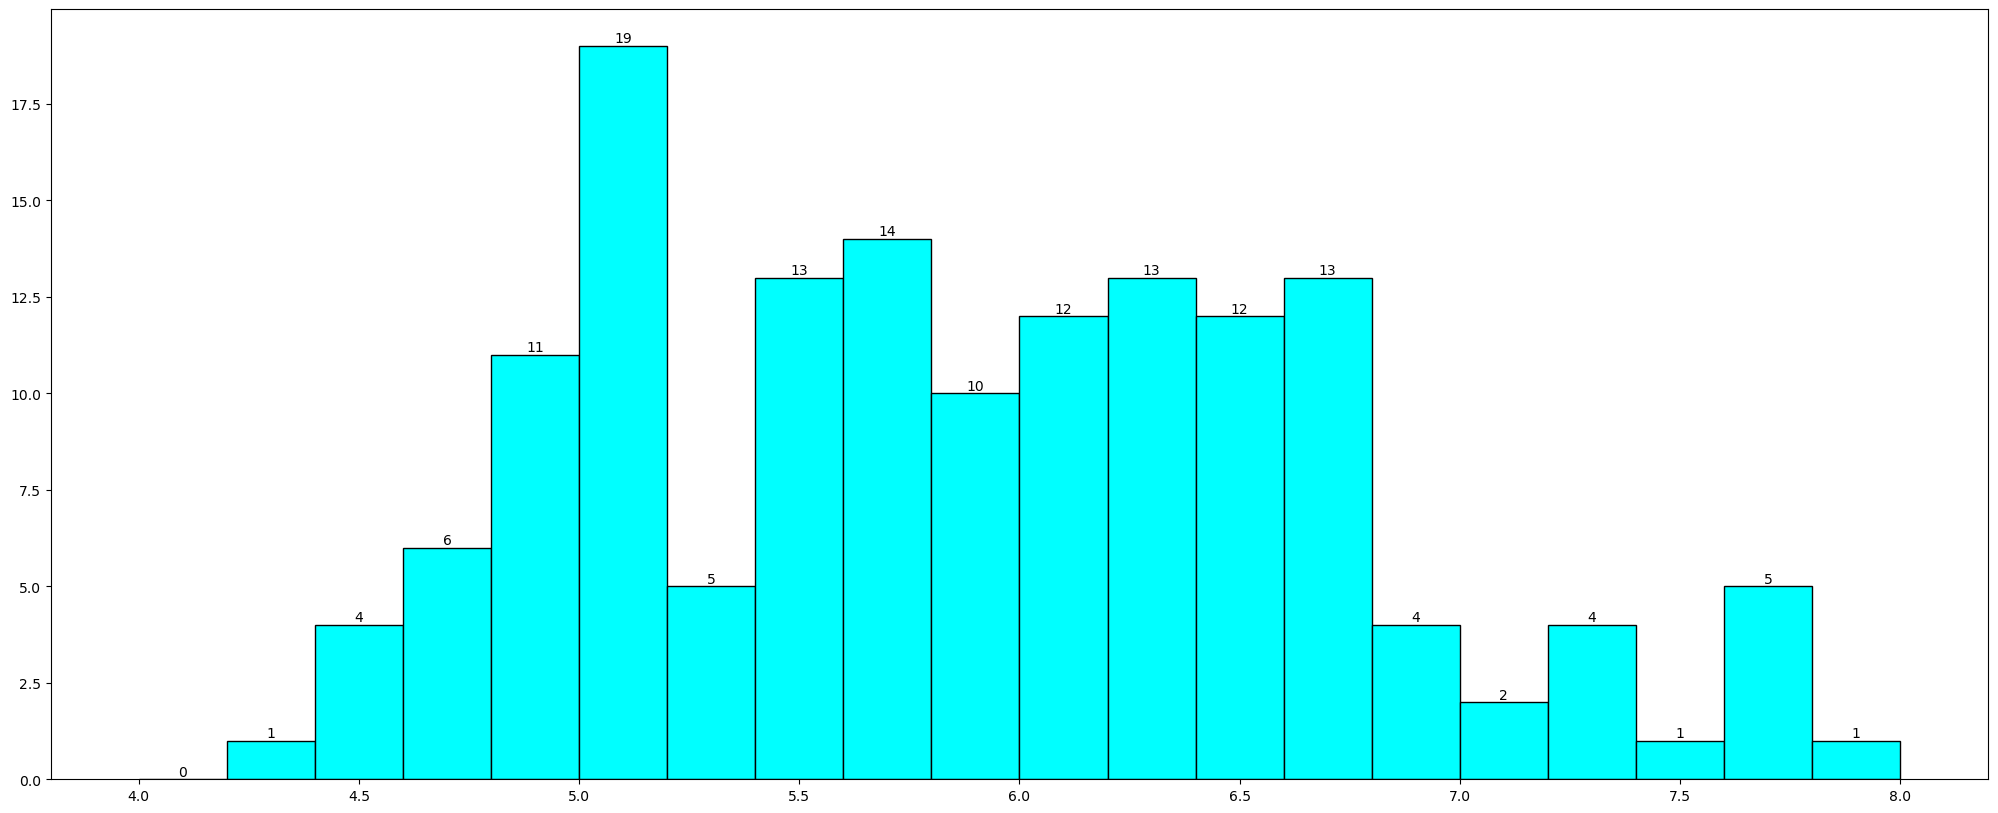

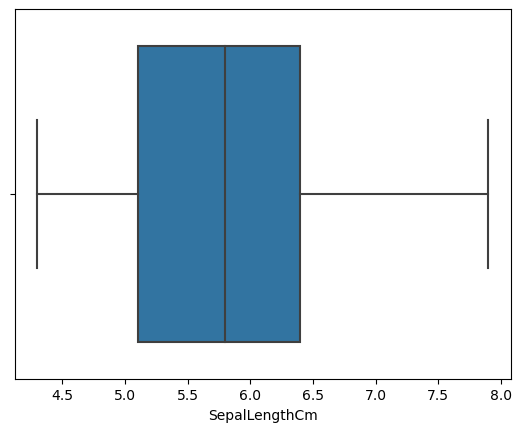

Description of SepalWidthCm
----------------------------------------------------------------------------
count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidthCm, dtype: float64 Distribution of SepalWidthCm
----------------------------------------------------------------------------
BoxPlot of SepalWidthCm
----------------------------------------------------------------------------


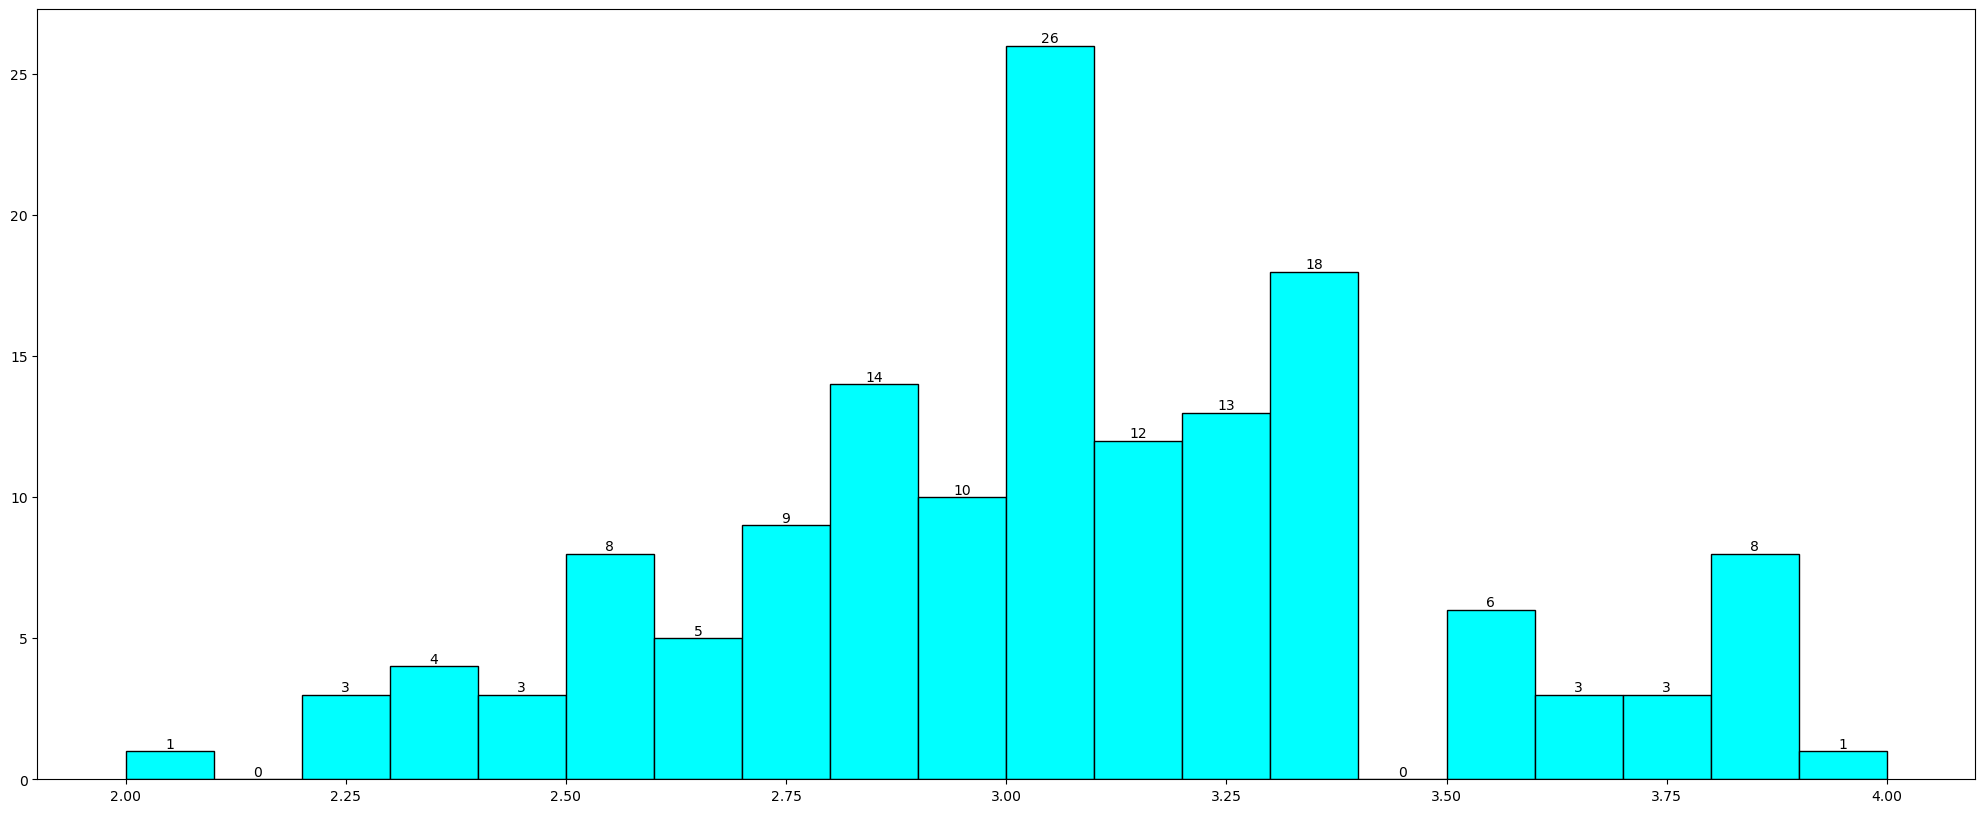

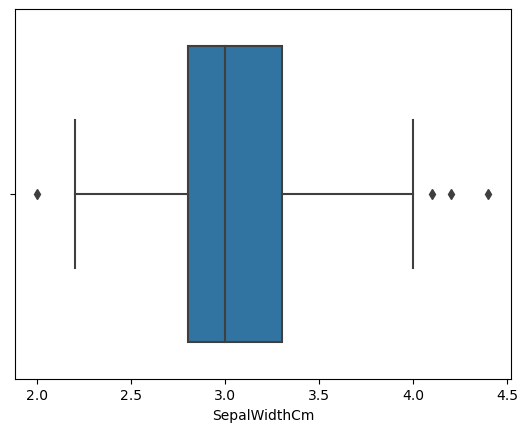

Description of PetalLengthCm
----------------------------------------------------------------------------
count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLengthCm, dtype: float64 Distribution of PetalLengthCm
----------------------------------------------------------------------------
BoxPlot of PetalLengthCm
----------------------------------------------------------------------------


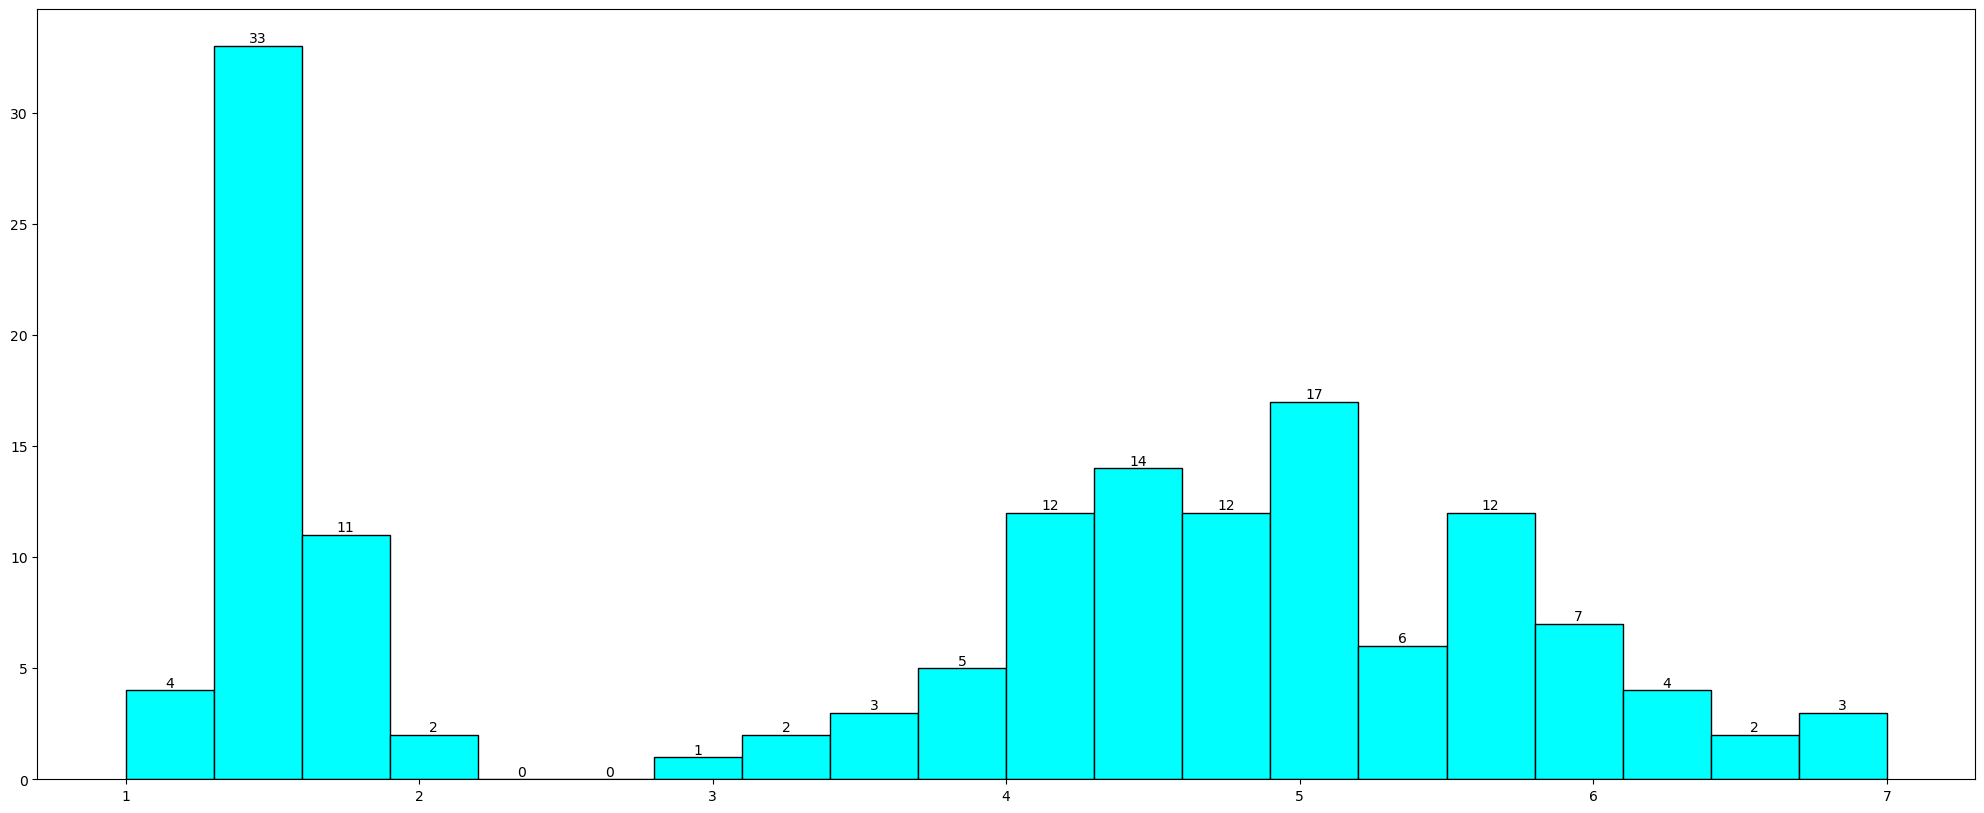

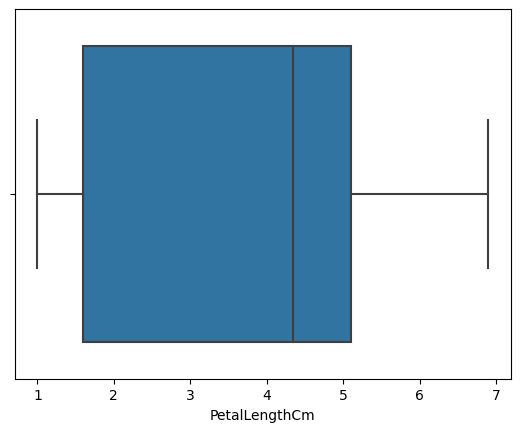

Description of PetalWidthCm
----------------------------------------------------------------------------
count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidthCm, dtype: float64 Distribution of PetalWidthCm
----------------------------------------------------------------------------
BoxPlot of PetalWidthCm
----------------------------------------------------------------------------


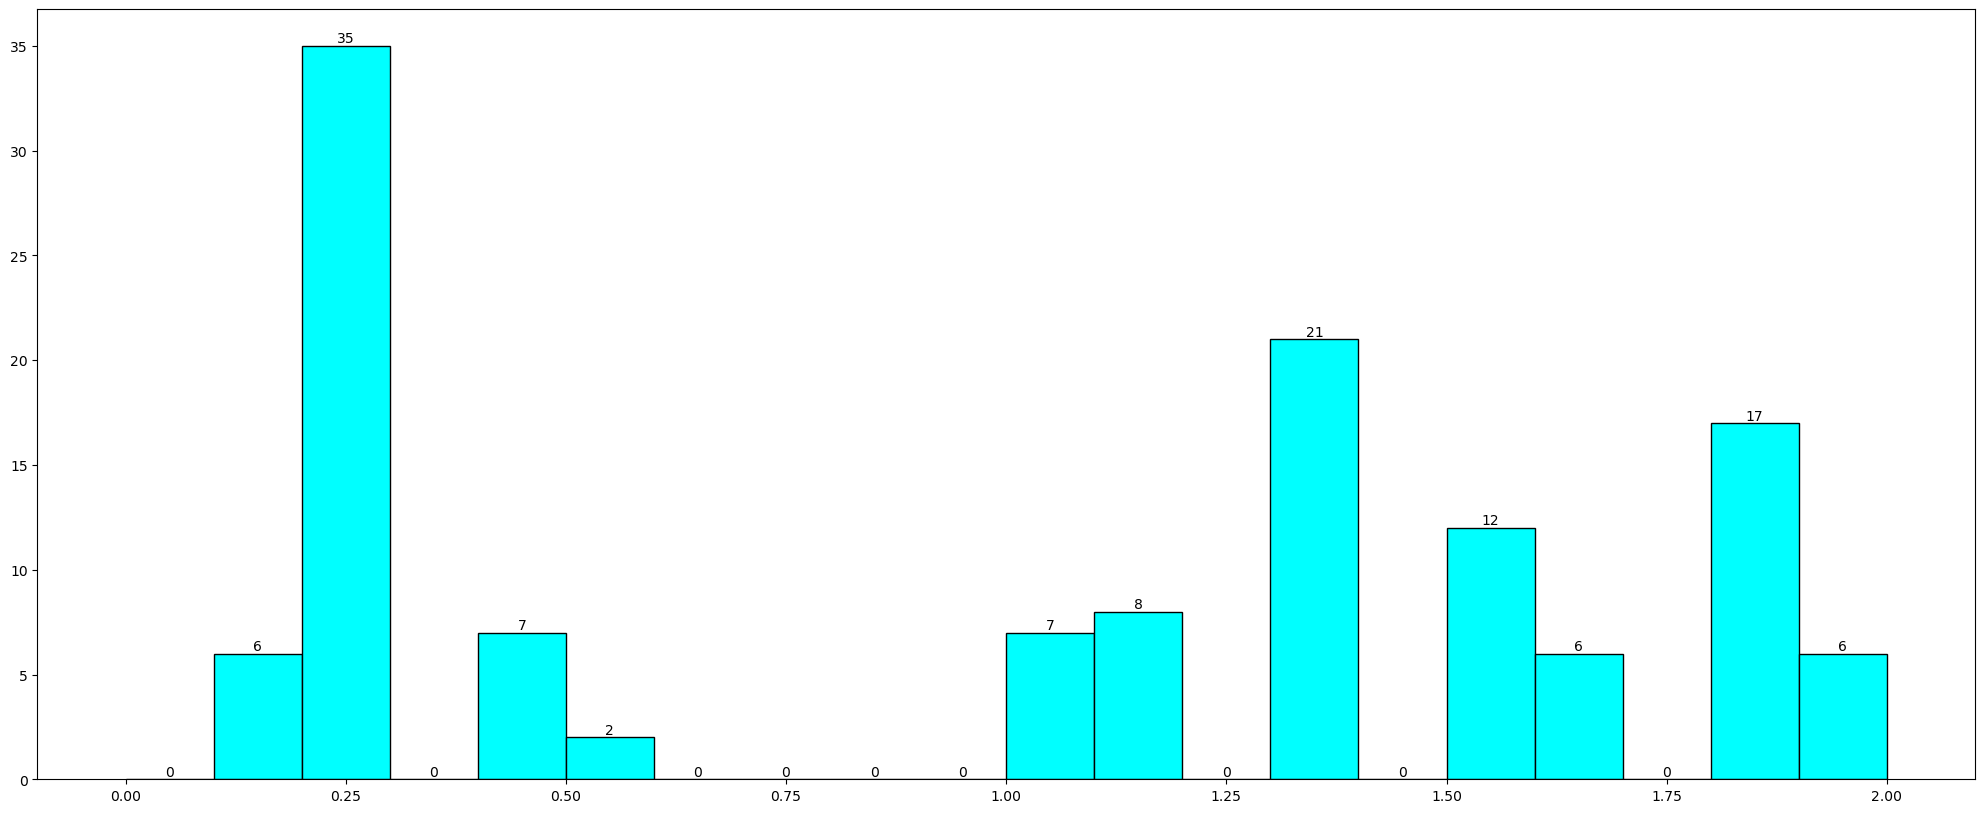

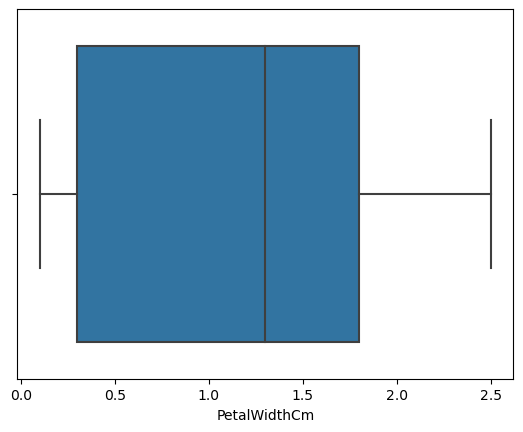

In [66]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


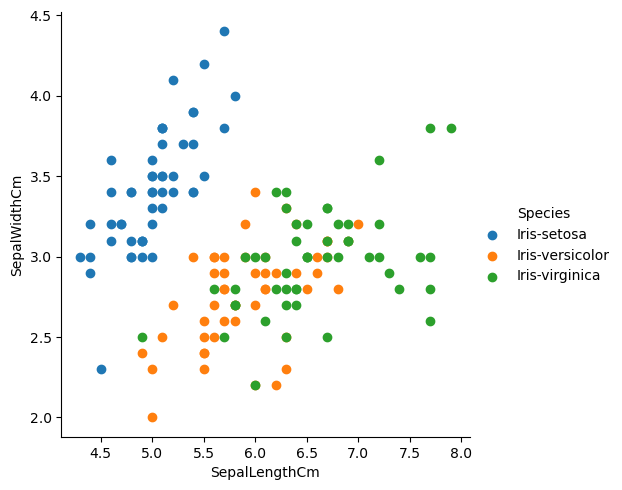

In [116]:
sns.FacetGrid(df, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

# CORRELATION

In [85]:
df1_num.corr()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109321       0.871305      0.817058
SepalWidthCm       -0.109321      1.000000      -0.421057     -0.356376
PetalLengthCm       0.871305     -0.421057       1.000000      0.961883
PetalWidthCm        0.817058     -0.356376       0.961883      1.000000

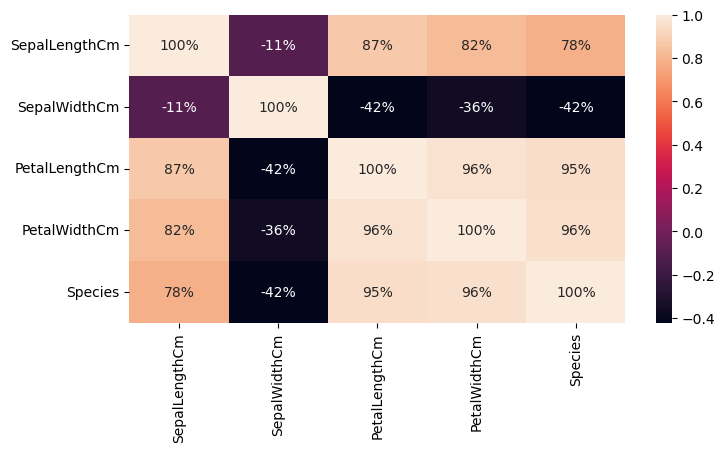

In [115]:
plt.figure(figsize=(8,4)) 
sns.heatmap(df1.corr(),annot=True,fmt=".0%") #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

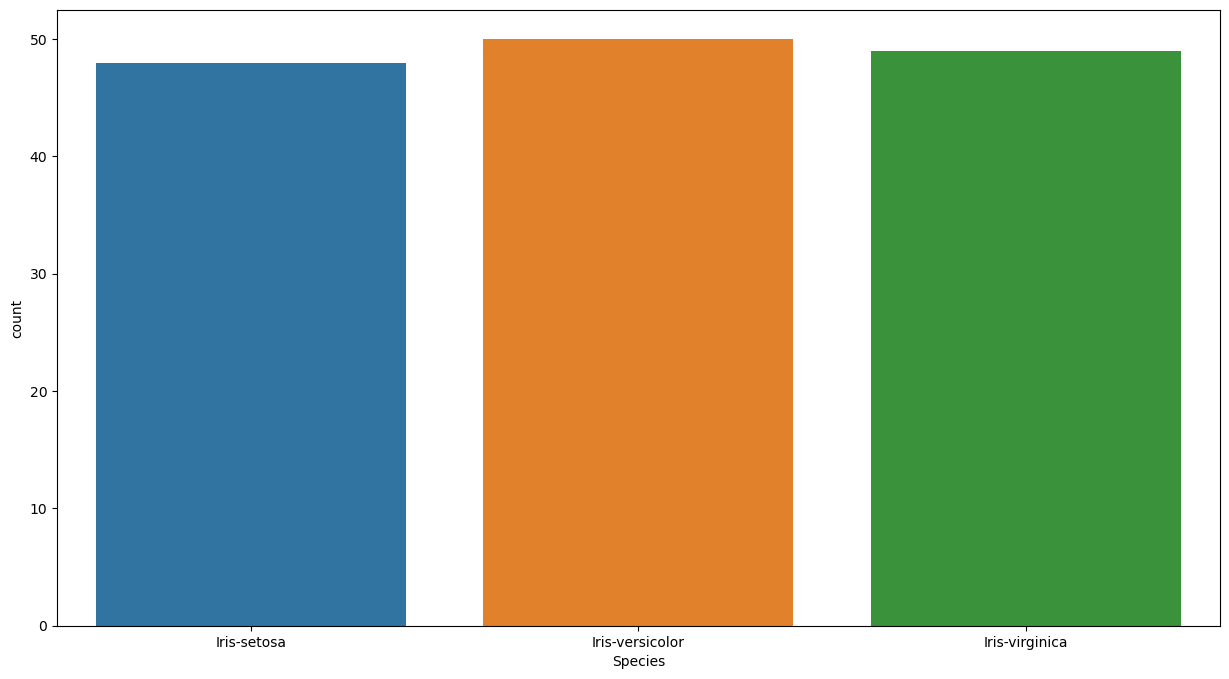

In [68]:
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='Species',data=df1)
plt.show();

# BIVARIATE ANALYSIS

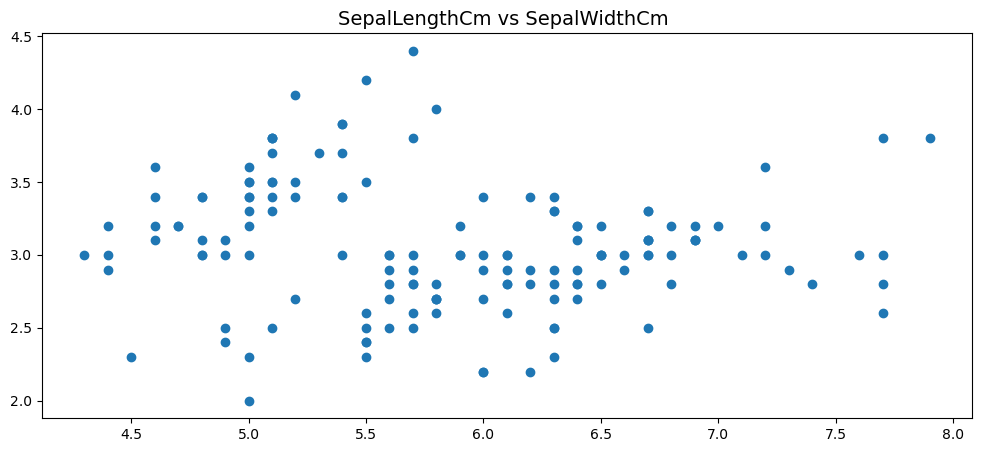

In [69]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='SepalLengthCm',y='SepalWidthCm', data= df1)
plt.title('SepalLengthCm vs SepalWidthCm ',fontsize=14)
plt.show();

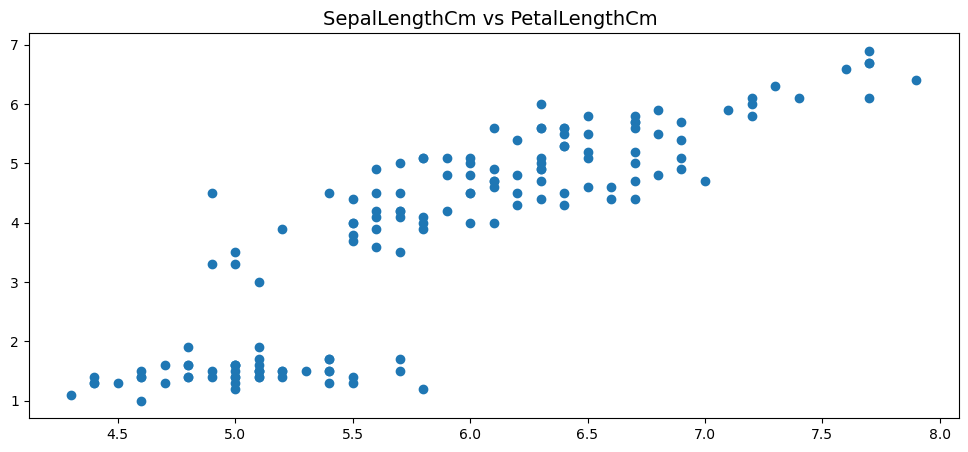

In [70]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='SepalLengthCm',y='PetalLengthCm', data= df1)
plt.title('SepalLengthCm vs PetalLengthCm ',fontsize=14)
plt.show();

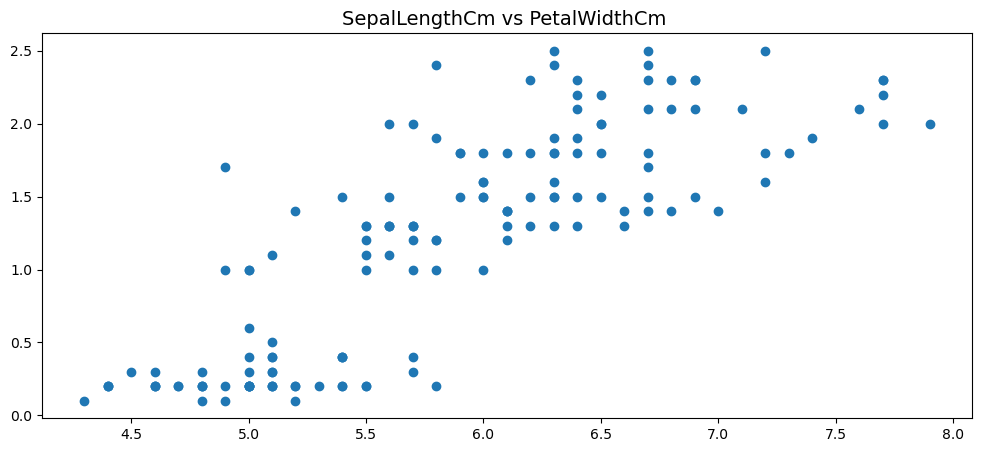

In [71]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='SepalLengthCm',y='PetalWidthCm', data= df1)
plt.title('SepalLengthCm vs PetalWidthCm ',fontsize=14)
plt.show();

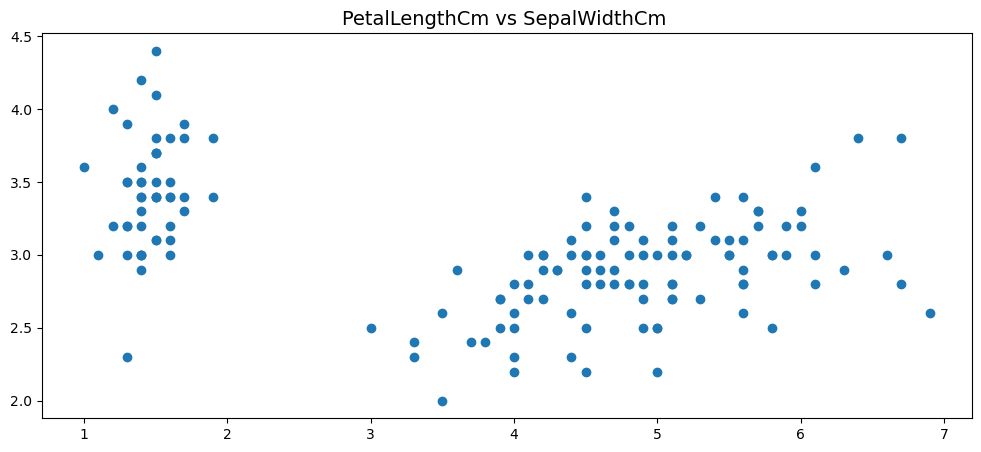

In [72]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='PetalLengthCm',y='SepalWidthCm', data= df1)
plt.title('PetalLengthCm vs SepalWidthCm ',fontsize=14)
plt.show();

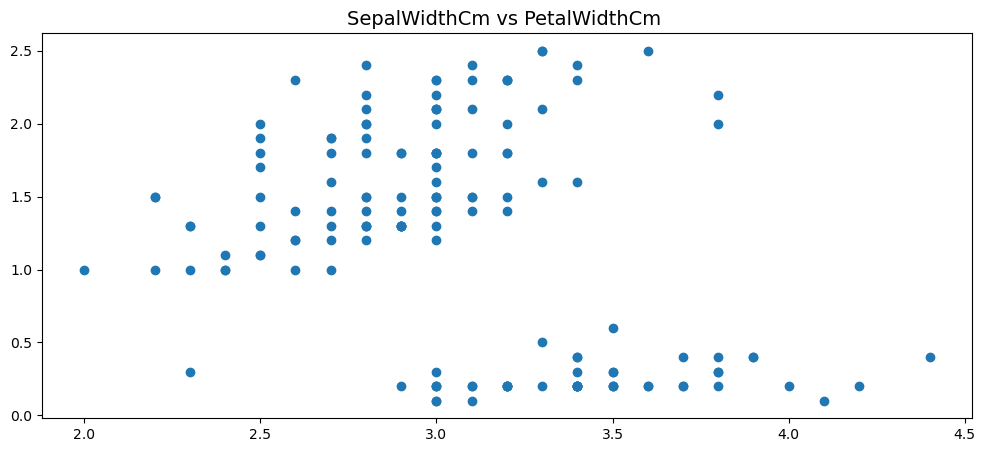

In [73]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='SepalWidthCm',y='PetalWidthCm', data= df1)
plt.title('SepalWidthCm vs PetalWidthCm ',fontsize=14)
plt.show();

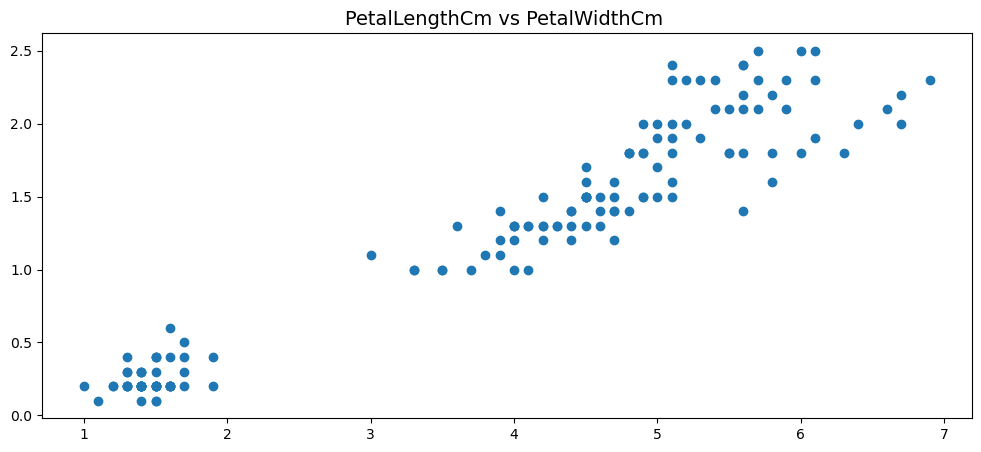

In [74]:
fig_dims=(12,5)
fig= plt.subplots(figsize=fig_dims)
plt.scatter(x='PetalLengthCm',y='PetalWidthCm', data= df1)
plt.title('PetalLengthCm vs PetalWidthCm ',fontsize=14)
plt.show();

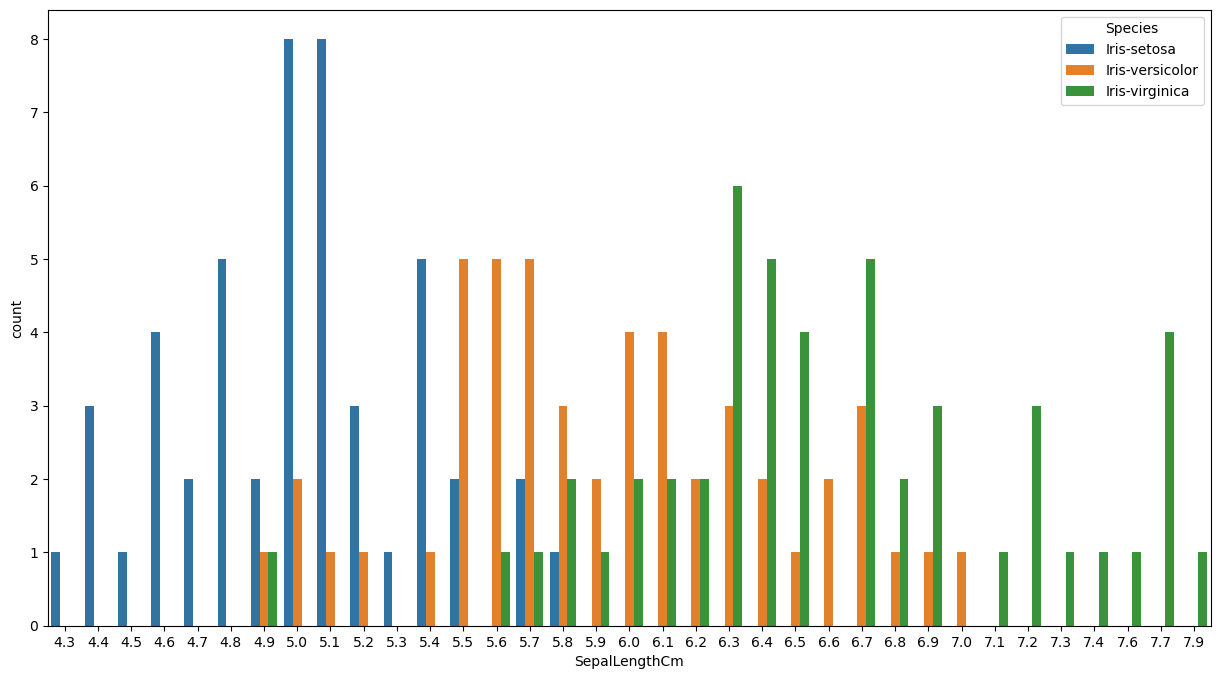

In [75]:
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='SepalLengthCm',data=df1,hue='Species')
plt.show();

In [76]:
df1

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[147 rows x 5 columns]

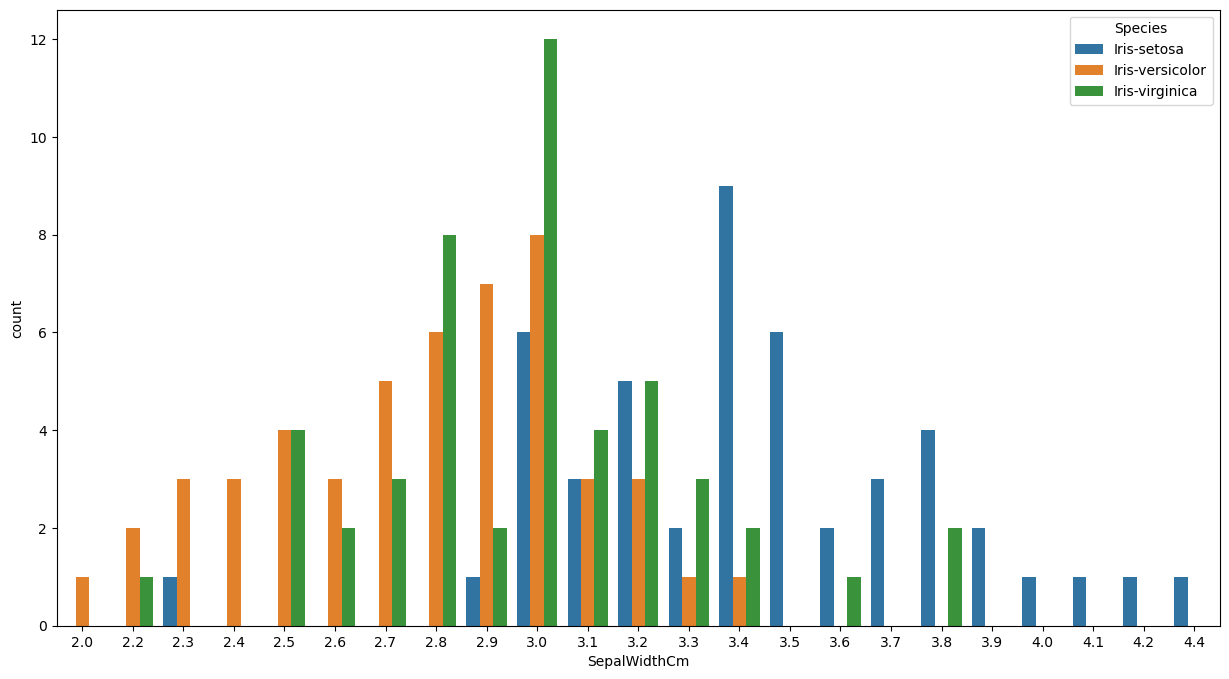

In [77]:
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='SepalWidthCm',data=df1,hue='Species')
plt.show();

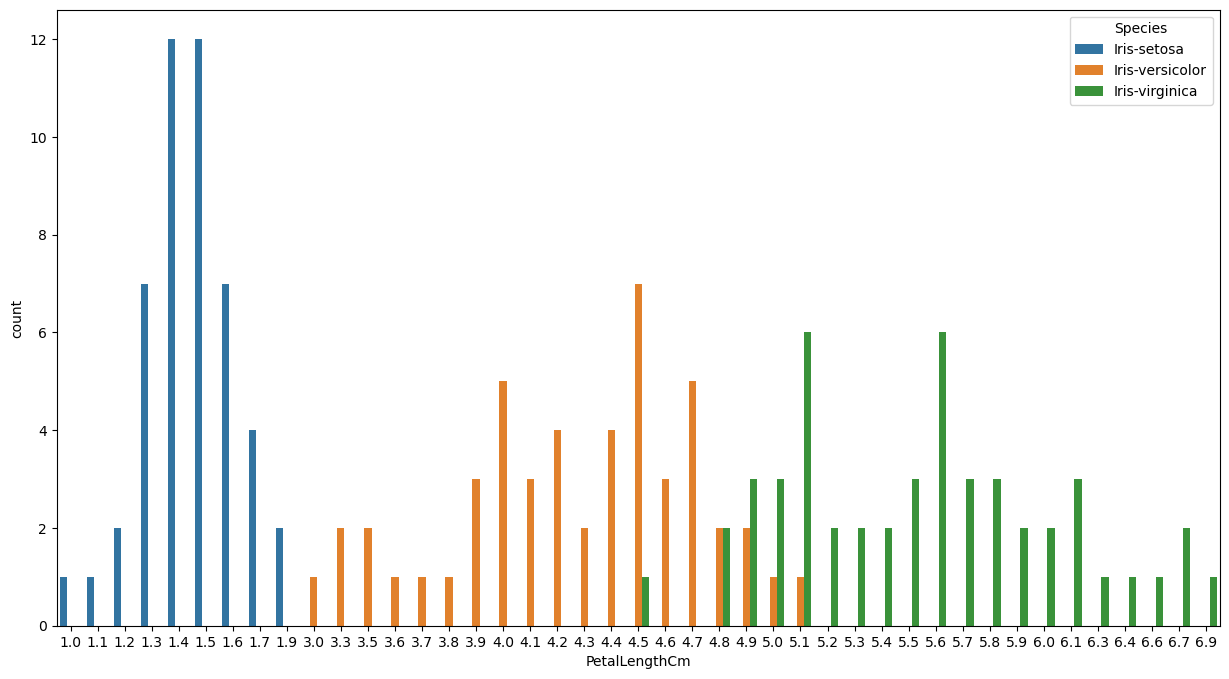

In [78]:
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='PetalLengthCm',data=df1,hue='Species')
plt.show();

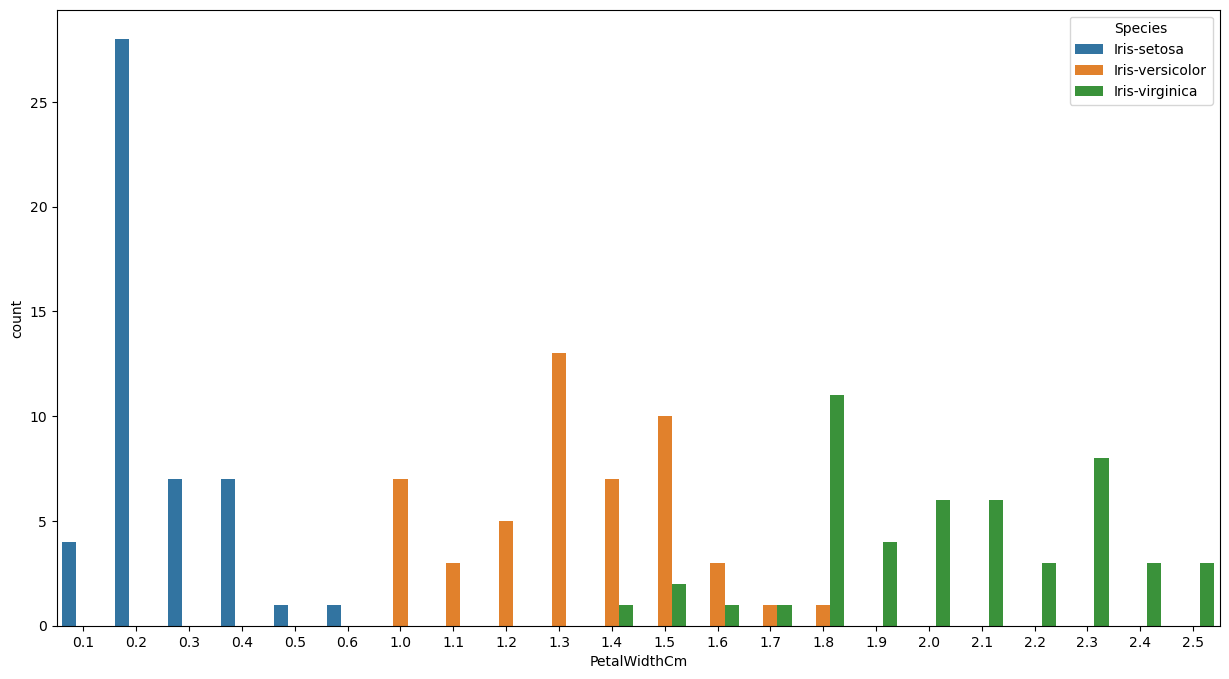

In [79]:
fig_dims=(15,8)
fig= plt.subplots(figsize=fig_dims)
sns.countplot(x='PetalWidthCm',data=df1,hue='Species')
plt.show();

C:\Users\THANUSRI\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


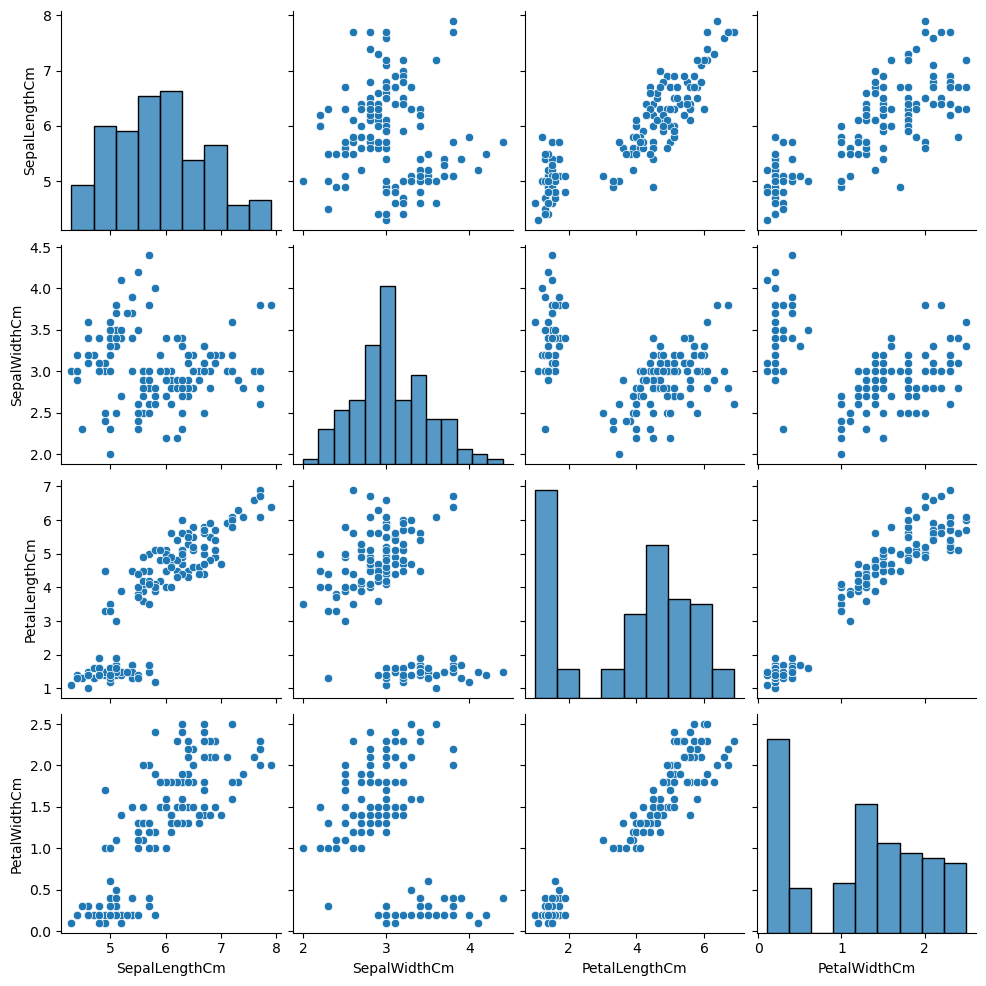

In [80]:
sns.pairplot(df1_num)

C:\Users\THANUSRI\anaconda31\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


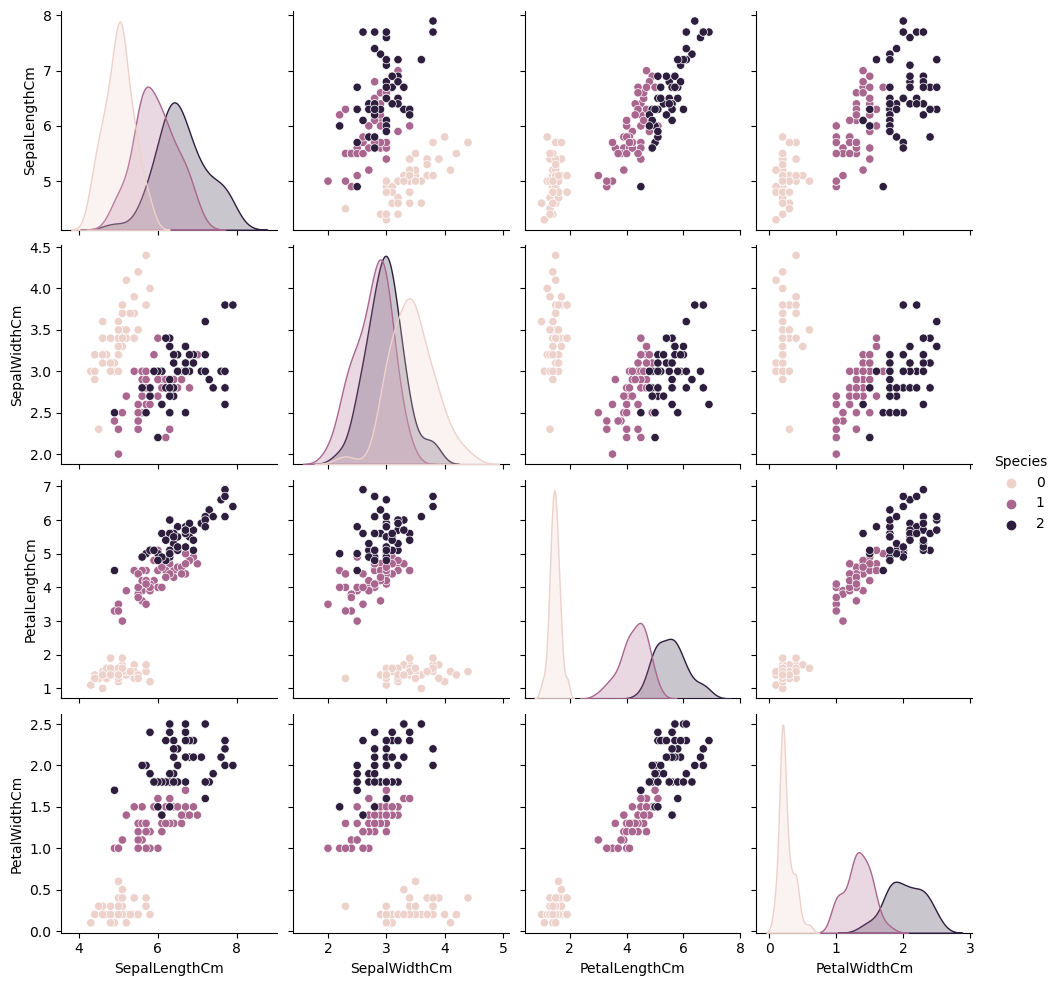

In [114]:
sns.pairplot(df1.iloc[:,:],hue='Species')

OUTLIERS

C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


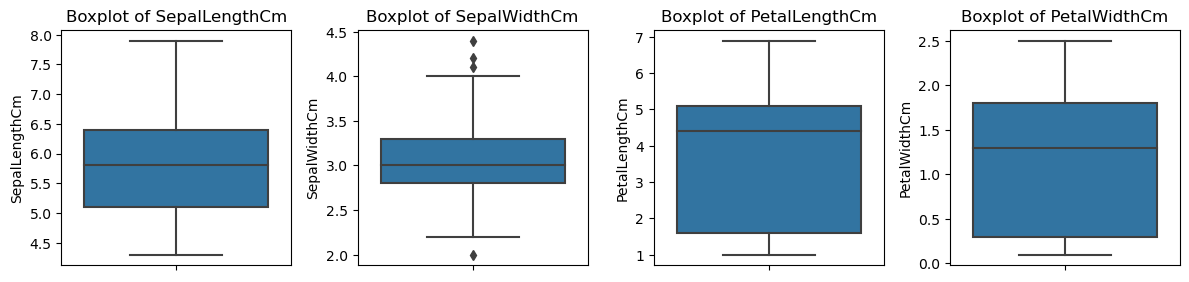

In [81]:
plt.figure(figsize=(12,8))
feature_list= df1_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(y=df1[feature_list[i]],data=df1) 
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [82]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1 
    lower_range= Q1-(1.5 * IQR) 
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\THANUSRI\AppData\Local\Temp\ipykernel_15000\3291406213.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


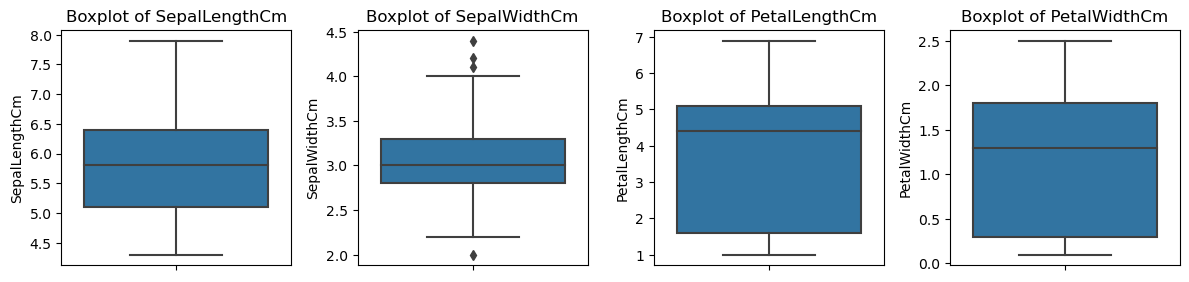

In [83]:
plt.figure(figsize=(12,8))
feature_list= df1_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i+1) 
    sns.boxplot(y=df1[feature_list[i]],data=df1) 
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

WE HAVE SUCCESSFULLY TREATED THE OUTLIERS

# LOGISTIC REGRESSION

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [95]:
from sklearn.preprocessing import LabelEncoder

In [96]:
LE= LabelEncoder()
LE

LabelEncoder()

In [97]:
df1['Species'] = LE.fit_transform(df1['Species'])
df1.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0

In [98]:
df1.tail()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
145            6.7           3.0            5.2           2.3        2
146            6.3           2.5            5.0           1.9        2
147            6.5           3.0            5.2           2.0        2
148            6.2           3.4            5.4           2.3        2
149            5.9           3.0            5.1           1.8        2

In [99]:
df1.Species.value_counts()

Species
1    50
2    49
0    48
Name: count, dtype: int64

In [100]:
from sklearn.model_selection import train_test_split

THE DATA IS SPLIITED INTO TRAINING AND TESTING DATA

In [102]:
X=df1.drop(columns=['Species'])
Y=df1['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,random_state=1)

In [106]:
X

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[147 rows x 4 columns]

In [107]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 147, dtype: int64

In [118]:
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (110, 4)
Test Shape (37, 4)


In [119]:
print("Train Shape",Y_train.shape)
print("Test Shape",Y_test.shape)

Train Shape (110,)
Test Shape (37,)


In [108]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [109]:
model.fit(X_train, Y_train)

LogisticRegression()

In [120]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [122]:
ytrain_predict

array([2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0],
      dtype=int64)

In [123]:
ytest_predict

array([2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2], dtype=int64)

In [144]:
Y_train.value_counts(1)

Species
2    0.336364
1    0.336364
0    0.327273
Name: proportion, dtype: float64

In [110]:
model.score(X_train, Y_train)

0.9727272727272728

In [111]:
model.score(X_test, Y_test)

0.9459459459459459

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [126]:
cm = confusion_matrix(Y_train, ytrain_predict)
cm

array([[36,  0,  0],
       [ 0, 35,  2],
       [ 0,  1, 36]], dtype=int64)

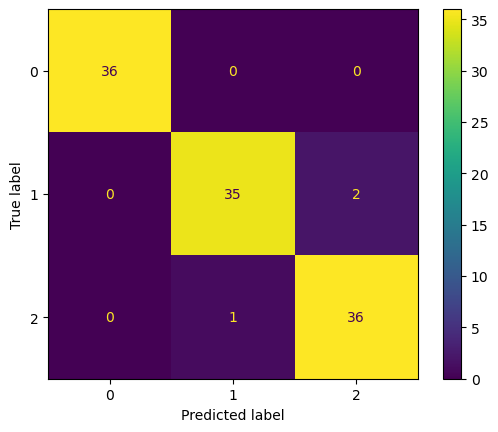

In [127]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [128]:
cm = confusion_matrix(Y_test, ytest_predict)
cm

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 11]], dtype=int64)

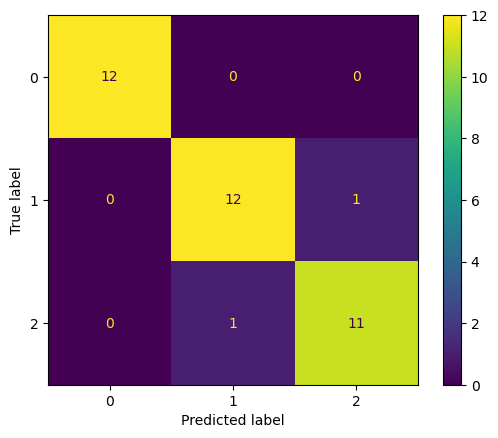

In [129]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [130]:
print(classification_report(Y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.95      0.96        37
           2       0.95      0.97      0.96        37

    accuracy                           0.97       110
   macro avg       0.97      0.97      0.97       110
weighted avg       0.97      0.97      0.97       110



In [131]:
print(classification_report(Y_test, ytest_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.92      0.92        13
           2       0.92      0.92      0.92        12

    accuracy                           0.95        37
   macro avg       0.95      0.95      0.95        37
weighted avg       0.95      0.95      0.95        37

